In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, regularizers, optimizers, callbacks
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Flatten, BatchNormalization, Dropout, Add, Concatenate, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.layers import MaxPooling2D

# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
from keras.datasets import cifar10
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization
from keras.models import Model,Sequential
import numpy as np
import pandas as pd


# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
from keras.datasets import cifar10
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization
from keras.models import Model,Sequential
import numpy as np
import pandas as pd
import pandas as pd

import plotly
from datetime import datetime

from tensorflow.keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import Input, datasets, layers, models

import tensorflow as tf
from tensorflow.keras.layers import ReLU,add, LeakyReLU

from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D, MaxPool2D, Flatten, BatchNormalization
from keras.layers import Dropout, Add, Concatenate
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adadelta
from keras.layers import MaxPooling2D, UpSampling2D, BatchNormalization, Activation

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, LearningRateScheduler
from tensorflow.keras import layers

In [11]:
# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Deep Learning - TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, regularizers, optimizers, callbacks
from tensorflow.keras.layers import (Input, Dense, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, 
                                     Flatten, BatchNormalization, Dropout, Add, Concatenate, Activation, 
                                     ReLU, LeakyReLU)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, LearningRateScheduler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10


In [12]:
# Preprocessing images
def preprocess_image(array):
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 32, 32, 3))
    return array

# Adding noise to images
def adding_noise(array):
    noise_factor = 0.3
    noisy_array = array + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=array.shape)
    return np.clip(noisy_array, 0.0, 1.0)

# Display original and noisy images
def display_images(original, noisy):
    n = 10
    indices = np.random.randint(len(original), size=n)
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original image
        plt.subplot(2, n, i + 1)
        plt.imshow(original[indices[i]])
        plt.axis('off')
        
        # Display noisy image
        plt.subplot(2, n, n + i + 1)
        plt.imshow(noisy[indices[i]])
        plt.axis('off')
    plt.show()


In [13]:
# Setting image dimensions
img_rows, img_cols, img_ch = 32, 32, 3

# Loading the CIFAR10 dataset
(x_train, train_labels), (x_test, test_labels) = datasets.cifar10.load_data()


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


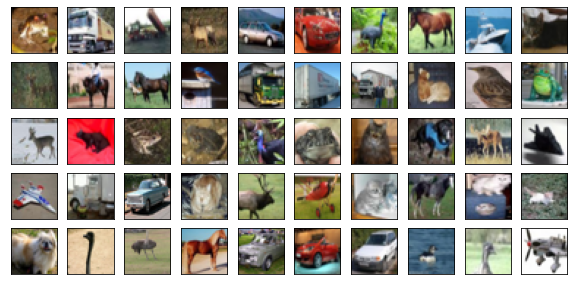

In [14]:
# Display of the first images of the training set
print('Train: X=%s, y=%s' % (x_train.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (x_test.shape, test_labels.shape))

plt.figure(figsize=(10, 10))
for index in range(50):
    plt.subplot(10, 10, index + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index])
plt.show()

In [15]:
# Pre-processing of training and test data
train_data = preprocess_image(x_train)
test_data = preprocess_image(x_test)

# Add noise to training and test data
noisy_train_data = adding_noise(train_data)
noisy_test_data = adding_noise(test_data)

# Display data dimensions for verification
print("Training data dimensions :", train_data.shape)
print("Test data dimensions:", test_data.shape)
print("Dimensions of noisy drive datas :", noisy_train_data.shape)
print("Dimensions of noisy test data :", noisy_test_data.shape)


Training data dimensions : (50000, 32, 32, 3)
Test data dimensions: (10000, 32, 32, 3)
Dimensions of noisy drive datas : (50000, 32, 32, 3)
Dimensions of noisy test data : (10000, 32, 32, 3)


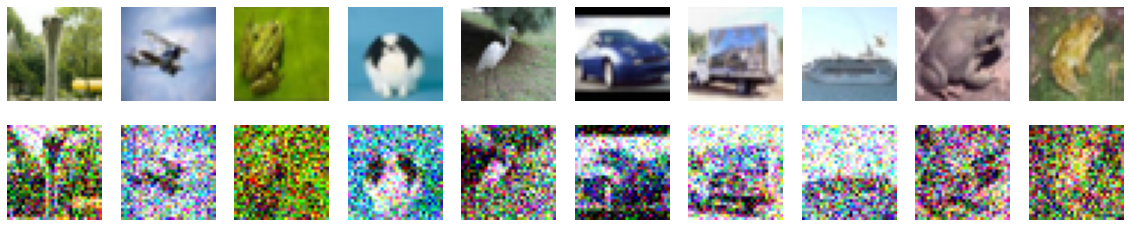

In [16]:
# Display of original images and their noisy versions
display_images(x_train, noisy_train_data)

In [17]:
# Autoencoder model input definition
input_img = Input((32, 32, 3))


In [18]:
# Autoncoder architecture

# Encodeur
encoder = Conv2D(32, 3, activation='relu', padding="same")(input_img)
encoder = BatchNormalization()(encoder)
encoder = MaxPooling2D(2)(encoder)
encoder = Conv2D(64, 3, activation='relu', padding="same")(encoder)
encoder = BatchNormalization()(encoder)
encoder = MaxPooling2D(2)(encoder)

# Latent space
mid = Conv2D(128, 3, activation='relu', padding="same")(encoder)
mid = BatchNormalization()(mid)

# Decodeur
up1 = UpSampling2D((2, 2))(mid)
decoder = Conv2D(64, 3, activation='relu', padding="same")(up1)
decoder = BatchNormalization()(decoder)
up2 = UpSampling2D((2, 2))(decoder)
decoder = Conv2D(32, 3, activation='relu', padding="same")(up2)
decoder = BatchNormalization()(decoder)

# Output
decoder = Conv2D(3, 1)(decoder)
output = Activation("sigmoid")(decoder)

# Model creation
model1 = Model(input_img, output)

# Display model summary
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 16, 16, 64)       256 

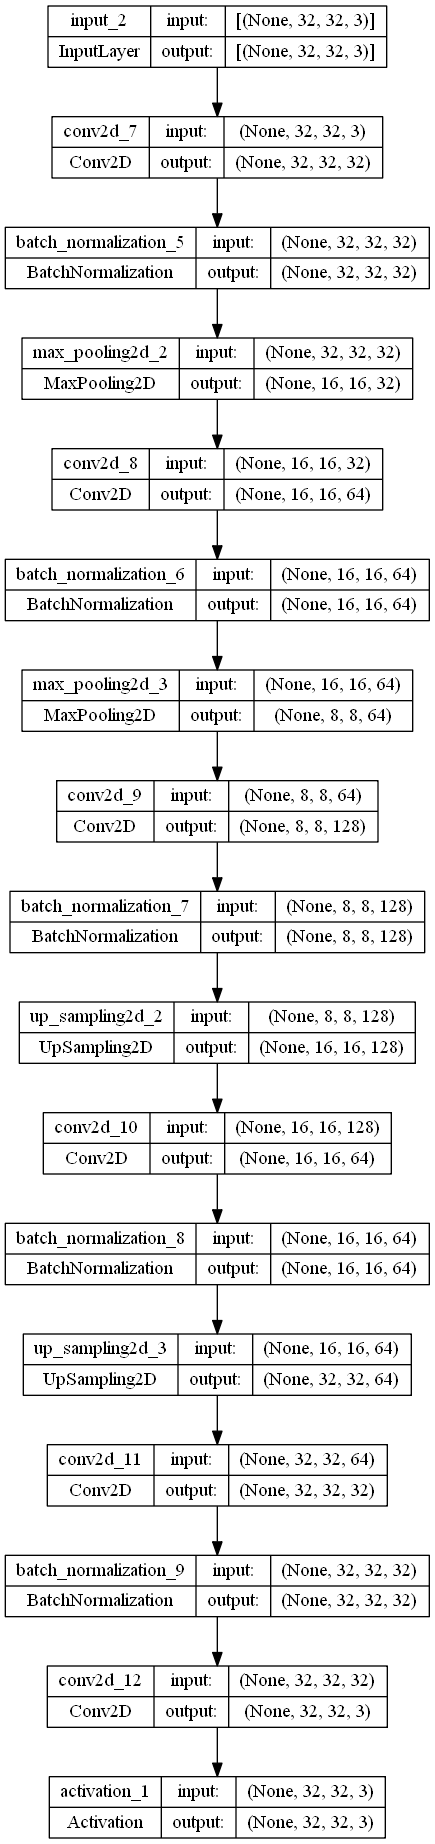

In [19]:
from keras.utils.vis_utils import plot_model
from IPython.display import display, Image

# Create a PNG image of the model
plot_model(model1, to_file='model.png', show_shapes=True, show_layer_names=True)

# Image display in notebook
display(Image(filename='model.png'))

In [22]:
# Model compilation
model1.compile(optimizer=Adam(learning_rate=0.0001), metrics=["mae", "accuracy"], loss='binary_crossentropy')

# Premature stop configuration
es_cb = EarlyStopping(monitor='val_loss', patience=2)

# Model training
history = model1.fit(noisy_train_data, train_data,
                     batch_size=20,
                     epochs=10,  
                     verbose=1,
                     validation_data=(noisy_test_data, test_data),
                     callbacks=[es_cb],
                     shuffle=True)


Epoch 1/10
2500/2500 [==============================] - 302s 119ms/step - loss: 0.5797 - mae: 0.0834 - accuracy: 0.6285 - val_loss: 0.5693 - val_mae: 0.0672 - val_accuracy: 0.6886
Epoch 2/10
2500/2500 [==============================] - 291s 117ms/step - loss: 0.5701 - mae: 0.0709 - accuracy: 0.6756 - val_loss: 0.5665 - val_mae: 0.0628 - val_accuracy: 0.7041
Epoch 3/10
2500/2500 [==============================] - 297s 119ms/step - loss: 0.5685 - mae: 0.0684 - accuracy: 0.6829 - val_loss: 0.5655 - val_mae: 0.0610 - val_accuracy: 0.7078
Epoch 4/10
2500/2500 [==============================] - 270s 108ms/step - loss: 0.5675 - mae: 0.0668 - accuracy: 0.6880 - val_loss: 0.5650 - val_mae: 0.0603 - val_accuracy: 0.7164
Epoch 5/10
2500/2500 [==============================] - 267s 107ms/step - loss: 0.5670 - mae: 0.0659 - accuracy: 0.6899 - val_loss: 0.5648 - val_mae: 0.0598 - val_accuracy: 0.7037
Epoch 6/10
2500/2500 [==============================] - 303s 121ms/step - loss: 0.5665 - mae: 0.0651

In [23]:
# Model evaluation
score = model1.evaluate(noisy_test_data, test_data)
print("Évaluation du modèle :", score)

# Model prediction
prediction_data = model1.predict(noisy_test_data)


313/313 [==============================] - 14s 34ms/step - loss: 0.5638 - mae: 0.0580 - accuracy: 0.7174
Évaluation du modèle : [0.5637733340263367, 0.05795206129550934, 0.7173833250999451]
313/313 [==============================] - 18s 37ms/step


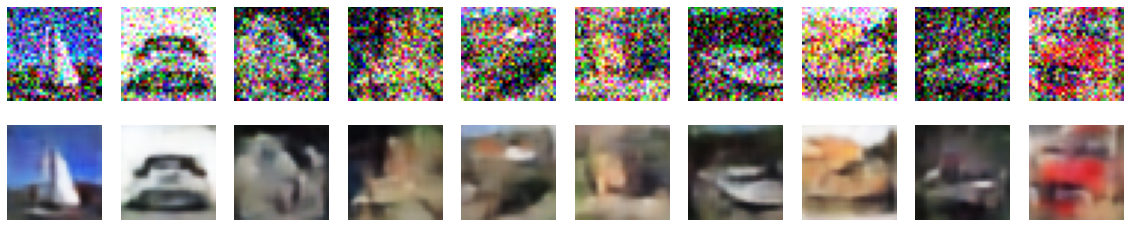

In [24]:
# Display of noisy images and their denoised versions predicted by the model
display_images(noisy_test_data, prediction_data)


In [25]:
# Function for plotting training and validation loss
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, 1) 
    plt.margins(0.05)  
    plt.legend()
    plt.show()

# Function for plotting training and validation accuracy
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.margins(0.05)
    plt.legend()
    plt.show()

# Function for plotting the training and validation MAE
def plot_mae(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('MAE and Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.ylim(0, 1)
    plt.margins(0.05)
    plt.legend()
    plt.show()


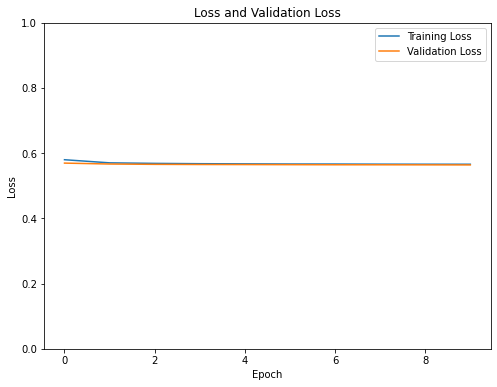

In [26]:
# Plotting training and validation losses
plot_loss(history)


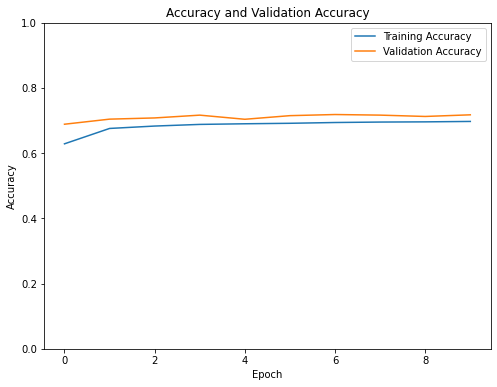

In [27]:
# Plotting of training and validation accuracy
plot_accuracy(history)


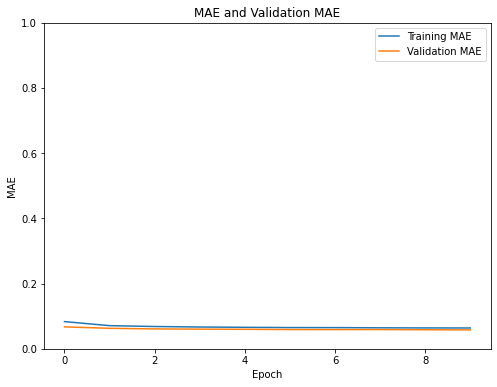

In [28]:
plot_mae(history)

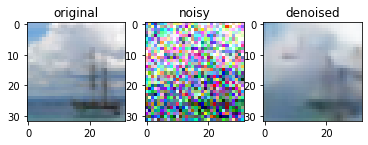

In [29]:
index = 166
plt.subplot(1,3,1)
plt.imshow(test_data[index])
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(noisy_test_data[index])
plt.title('noisy')
plt.subplot(1,3,3)
plt.imshow(prediction_data[index])
plt.title('denoised')
plt.show()

In [30]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim


In [31]:
# Calculation of  PSNR and SSIM
psnr_values = []
ssim_values = []

for i in range(len(test_data)):
    original = test_data[i]
    denoised = prediction_data[i]

    # Calculation of PSNR and SSIM for each pair of images
    psnr_val = psnr(original, denoised, data_range=original.max() - original.min())
    ssim_val = ssim(original, denoised, multichannel=True)

    psnr_values.append(psnr_val)
    ssim_values.append(ssim_val)

# Mean
average_psnr = np.mean(psnr_values)
average_ssim = np.mean(ssim_values)

print(f'Mean PSNR: {average_psnr}')
print(f'MEan SSIM: {average_ssim}')


Mean PSNR: 21.421917284128277
MEan SSIM: 0.7939052070660837


In [32]:
import umap


In [34]:
from keras.models import Model

# Use the output of the last encoder layer as output for the encoder model
encoder_output = model1.get_layer('max_pooling2d_3').output

# Encoder model creation
encoder_model = Model(inputs=model1.input, outputs=encoder_output)

# Encode training set images
encoded_images = encoder_model.predict(x_test)

313/313 [==============================] - 5s 10ms/step


In [35]:
# Creation of UMAP
reducer = umap.UMAP(random_state=42)

# Dimension reduction
umap_embedding = reducer.fit_transform(encoded_images.reshape(len(encoded_images), -1))  

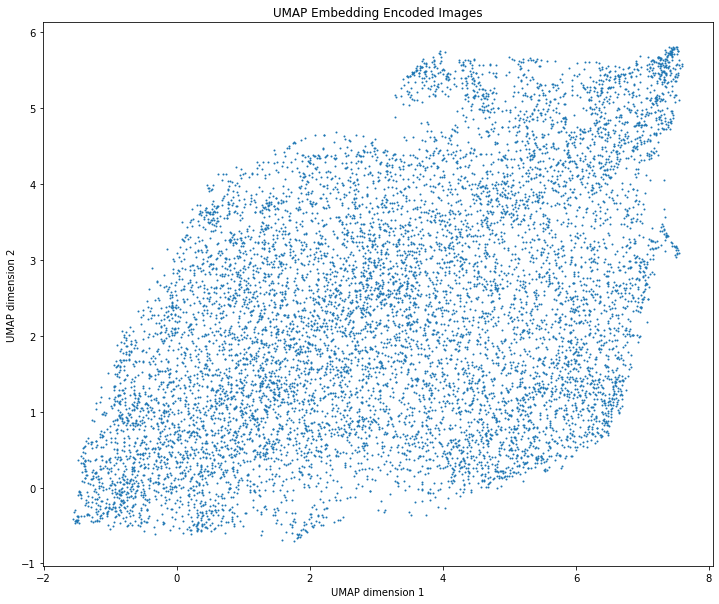

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=1)
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.title('UMAP Embedding Encoded Images')
plt.show()
